In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from numpy.random import normal as rnorm
from statsmodels.stats.outliers_influence import OLSInfluence

# Loading data

In [85]:
df_reviews = pd.read_csv('new_start_reviews.csv')

In [86]:
df_general = pd.read_csv('new_start_general.csv')

# Basic Informations about the dataset

In [87]:
df_reviews.shape

(3136010, 18)

In [88]:
df_general.shape

(6203, 12)

In [89]:
print('Number of Positive reviews: ',len(df_reviews[df_reviews['review_type']=='positive']))

Number of Positive reviews:  2879129


In [90]:
print('Number of Negative reviews: ',df_reviews.shape[0] - len(df_reviews[df_reviews['review_type']=='positive']))

Number of Negative reviews:  256881


In [91]:
df_reviews.head()

,Unnamed: 0,game_id,review_id,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review_text,review_score,steam_purchase,comment_count,voted_up,votes_up,votes_funny,written_during_early_access,review_type
0,0,1116300,55254262,283,21,14,0,7.0,1571625583,it seemed to have a lot of content and a ball ...,0.000000,True,0,True,0,0,False,positive
1,0,1116310,83461406,9,1,0,0,NaN,0,Would like to be able to add it to my trailer ...,0.000000,True,0,True,0,0,False,positive
2,0,1116310,82867017,216,54,0,0,NaN,0,10/10,0.653399,True,0,True,17,0,False,positive
3,0,1116310,77674353,118,12,0,0,NaN,0,this game is by far one of the best,0.000000,True,0,True,0,0,False,positive
4,0,1116310,72997129,74,9,0,0,NaN,0,I love space exploration so when I seen this I...,0.000000,True,0,True,0,0,False,positive


# Data cleaning and preprocessing

## Dropping the random "unnamed:o" column

In [92]:
df_reviews = df_reviews.drop(df_reviews.columns[0],axis=1)

In [93]:
df_general = df_general.drop(df_general.columns[0],axis=1)

## Checking for repeating values

In [94]:
len(df_reviews['review_id']),len(np.unique(df_reviews['review_id']))

(3136010, 3119071)

In [95]:
df_reviews = df_reviews.drop_duplicates(subset=['review_id'])
len(df_reviews['review_id']),len(np.unique(df_reviews['review_id']))

(3119071, 3119071)

In [96]:
len(df_general['game_id']),len(np.unique(df_general['game_id']))

(6203, 6176)

In [97]:
df_general = df_general.drop_duplicates(subset=['game_id'])
len(df_general['game_id']),len(np.unique(df_general['game_id']))

(6176, 6176)

## Checking for missing values

In [98]:
for col in df_general.columns:
    pct_missing = np.mean(df_general[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

game_id - 0%
game_name - 0%
publisher - 7%
genre - 2%
price - 0%
initialprice - 100%
overall_score - 0%
score_desc - 0%
total_positive - 0%
total_negative - 0%
total_reviews - 0%


In [99]:
for col in df_reviews.columns:
    pct_missing = np.mean(df_reviews[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

game_id - 0%
review_id - 0%
num_games_owned - 0%
num_reviews - 0%
playtime_forever - 0%
playtime_last_two_weeks - 0%
playtime_at_review - 2%
last_played - 0%
review_text - 0%
review_score - 0%
steam_purchase - 0%
comment_count - 0%
voted_up - 0%
votes_up - 0%
votes_funny - 0%
written_during_early_access - 0%
review_type - 0%


## Dropping misssing values 

In [100]:
df_reviews = df_reviews.dropna()

In [101]:
df_general.drop(['initialprice'],inplace=True,axis=1)

In [102]:
df_general = df_general.dropna()

In [103]:
for col in df_general.columns:
    pct_missing = np.mean(df_general[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

game_id - 0%
game_name - 0%
publisher - 0%
genre - 0%
price - 0%
overall_score - 0%
score_desc - 0%
total_positive - 0%
total_negative - 0%
total_reviews - 0%


In [104]:
for col in df_reviews.columns:
    pct_missing = np.mean(df_reviews[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

game_id - 0%
review_id - 0%
num_games_owned - 0%
num_reviews - 0%
playtime_forever - 0%
playtime_last_two_weeks - 0%
playtime_at_review - 0%
last_played - 0%
review_text - 0%
review_score - 0%
steam_purchase - 0%
comment_count - 0%
voted_up - 0%
votes_up - 0%
votes_funny - 0%
written_during_early_access - 0%
review_type - 0%


In [105]:
df_reviews.shape

(3064286, 17)

In [106]:
print('Number of Positive reviews: ',len(df_reviews[df_reviews['review_type']=='positive']))

Number of Positive reviews:  2823267


In [107]:
print('Number of Negative reviews: ',df_reviews.shape[0] - len(df_reviews[df_reviews['review_type']=='positive']))

Number of Negative reviews:  241019


In [108]:
df_general.shape

(5727, 10)

## Keeping only information about games that we scrapped thier reviews

In [109]:
df_general = df_general[df_general.game_id.isin(df_reviews.game_id)]

In [110]:
df_reviews = df_reviews[df_reviews.game_id.isin(df_general.game_id)]

In [111]:
df_general.shape, df_reviews.shape

((4281, 10), (3047156, 17))

## Chaning the index

In [112]:
df_reviews = df_reviews.set_index('review_id')

In [113]:
df_general = df_general.set_index('game_id')

## Adding new columns to df_reviews (review_length/review_readability)

In [115]:
review_length = []
for text in df_reviews['review_text']:
    review_length.append(len(text))
df_reviews['review_length'] = review_length
del review_length

In [116]:
import textstat
textstat.set_lang("en")
review_readability = []
for text in df_reviews['review_text']:
    review_readability.append(textstat.coleman_liau_index(text))
df_reviews['review_readability'] = review_readability
del review_readability

## Adding new colums to df_general (average playtime at review and forever

In [114]:
avr_play_time_at_review = df_reviews[['game_id','playtime_at_review']].groupby(['game_id']).mean()
df_general = pd.concat([df_general, avr_play_time_at_review], axis=1)
df_general = df_general.rename(columns={"playtime_at_review" : "avr_play_time_at_review"})
df_general

,game_name,publisher,genre,price,overall_score,score_desc,total_positive,total_negative,total_reviews,avr_play_time_at_review
game_id,,,,,,,,,,
10,Counter-Strike,Valve,Action Games,999.0,9,Overwhelmingly Positive,20942,773,21715,19829.298122
20,Team Fortress Classic,Valve,Action Games,499.0,8,Very Positive,1987,400,2387,4208.908705
30,Day of Defeat,Valve,Action Games,499.0,8,Very Positive,1227,165,1392,5989.807246
40,Deathmatch Classic,Valve,Action Games,499.0,8,Very Positive,576,134,710,1369.031429
50,Half-Life: Opposing Force,Valve,Action Games,499.0,9,Overwhelmingly Positive,4510,208,4718,1063.887042
...,...,...,...,...,...,...,...,...,...,...
1116350,Exsys,Peakware Studio,"Action, Indie, Early Access",1099.0,0,1 user reviews,0,1,1,10.000000
1116360,JERRY JOBHOPPER,NK CREATIV GAMES,"Indie, RPG, Simulation, Strategy, Early Access",999.0,0,1 user reviews,1,0,1,6.000000
1500820,Caravaneer 2,Dmitry Zheltobriukhov,"Indie, RPG, Simulation, Strategy",599.0,8,Very Positive,50,0,50,730.560000


# getting the averge playtime forever per game

In [117]:
avr_playtime_forever = df_reviews[['game_id','playtime_forever']].groupby(['game_id']).mean()
df_general = pd.concat([df_general, avr_playtime_forever], axis=1)
df_general = df_general.rename(columns={"playtime_forever" : "avr_playtime_forever"})
df_general

,game_name,publisher,genre,price,overall_score,score_desc,total_positive,total_negative,total_reviews,avr_play_time_at_review,avr_playtime_forever
game_id,,,,,,,,,,,
10,Counter-Strike,Valve,Action Games,999.0,9,Overwhelmingly Positive,20942,773,21715,19829.298122,33965.425539
20,Team Fortress Classic,Valve,Action Games,499.0,8,Very Positive,1987,400,2387,4208.908705,6614.785138
30,Day of Defeat,Valve,Action Games,499.0,8,Very Positive,1227,165,1392,5989.807246,8753.608696
40,Deathmatch Classic,Valve,Action Games,499.0,8,Very Positive,576,134,710,1369.031429,2242.895714
50,Half-Life: Opposing Force,Valve,Action Games,499.0,9,Overwhelmingly Positive,4510,208,4718,1063.887042,1641.328858
...,...,...,...,...,...,...,...,...,...,...,...
1116350,Exsys,Peakware Studio,"Action, Indie, Early Access",1099.0,0,1 user reviews,0,1,1,10.000000,10.000000
1116360,JERRY JOBHOPPER,NK CREATIV GAMES,"Indie, RPG, Simulation, Strategy, Early Access",999.0,0,1 user reviews,1,0,1,6.000000,6.000000
1500820,Caravaneer 2,Dmitry Zheltobriukhov,"Indie, RPG, Simulation, Strategy",599.0,8,Very Positive,50,0,50,730.560000,2852.660000


# Rearranging/renaming/removing columns

<AxesSubplot:>

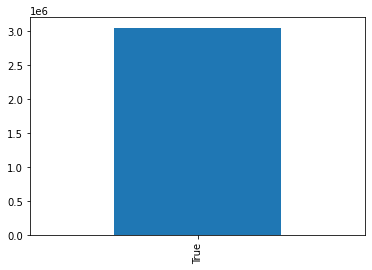

In [118]:
df_reviews['steam_purchase'].value_counts().plot.bar()

<AxesSubplot:>

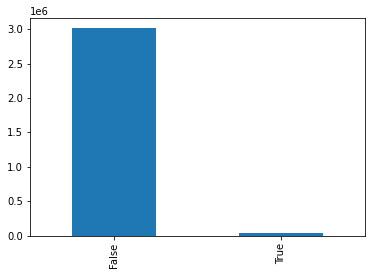

In [119]:
df_reviews['written_during_early_access'].value_counts().plot.bar()

In [120]:
df_reviews.drop(['steam_purchase','written_during_early_access','playtime_last_two_weeks'], inplace=True, axis=1)

In [121]:
df_reviews = df_reviews.rename(columns={"review_score": "helpfulness_score"})

In [122]:
df_reviews = df_reviews.reindex(columns=['game_id', 'num_games_owned', 'num_reviews', 'playtime_forever',
                                         'playtime_at_review', 'last_played',
                                         'review_text','review_length','review_readability','comment_count',
                                         'voted_up','votes_up', 'votes_funny', 'review_type','helpfulness_score'])

<AxesSubplot:>

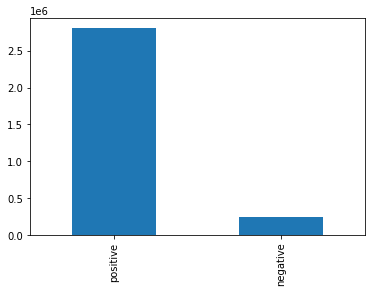

In [123]:
df_reviews['review_type'].value_counts().plot.bar()

In [124]:
replace_review_type = {"review_type": {"positive":1,"negative":0}}
df_reviews = df_reviews.replace(replace_review_type)

# Data Description

In [125]:
df_reviews.describe()

,game_id,num_games_owned,num_reviews,playtime_forever,playtime_at_review,last_played,review_length,review_readability,comment_count,votes_up,votes_funny,review_type,helpfulness_score
count,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06,3.047156e+06
mean,9.513352e+04,1.797741e+02,1.786743e+01,2.487033e+04,1.360090e+04,1.547353e+09,1.969631e+02,6.247272e+00,1.520772e-01,1.880921e+00,1.663219e+05,9.214579e-01,1.871666e-01
std,2.606328e+05,3.911212e+02,6.422246e+01,5.590586e+04,3.538496e+04,1.477376e+08,5.569448e+02,1.419612e+03,1.714286e+00,2.788564e+01,2.672669e+07,2.690228e-01,2.495697e-01
min,1.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-3.961000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.300000e+02,2.600000e+01,2.000000e+00,7.520000e+02,4.260000e+02,1.526961e+09,1.600000e+01,-1.610000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.000000e+03,7.800000e+01,5.000000e+00,3.378000e+03,1.714000e+03,1.589307e+09,5.300000e+01,4.610000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.478000e+04,1.930000e+02,1.400000e+01,2.316400e+04,9.979000e+03,1.607895e+09,1.680000e+02,7.880000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.968366e-01
max,1.510620e+06,2.203400e+04,5.236000e+03,3.894437e+06,3.813573e+06,1.611414e+09,4.195800e+05,2.433519e+06,9.870000e+02,1.265200e+04,4.294967e+09,1.000000e+00,9.825376e-01


In [127]:
df_reviews.median()

game_id               4.000000e+03
num_games_owned       7.800000e+01
num_reviews           5.000000e+00
playtime_forever      3.378000e+03
playtime_at_review    1.714000e+03
last_played           1.589307e+09
review_length         5.300000e+01
review_readability    4.610000e+00
comment_count         0.000000e+00
voted_up              1.000000e+00
votes_up              0.000000e+00
votes_funny           0.000000e+00
review_type           1.000000e+00
helpfulness_score     0.000000e+00
dtype: float64

In [126]:
df_general.describe()

,price,overall_score,total_positive,total_negative,total_reviews,avr_play_time_at_review,avr_playtime_forever
count,4281.000000,4281.000000,4281.000000,4281.000000,4281.000000,4281.000000,4281.000000
mean,862.168652,3.754029,681.067508,83.212801,764.280308,896.306993,1623.862058
std,1028.673445,3.416835,13837.349306,1764.809567,15535.580358,2975.449317,5672.729713
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
25%,199.000000,0.000000,2.000000,1.000000,3.000000,68.428571,105.000000
50%,599.000000,5.000000,10.000000,3.000000,14.000000,226.500000,351.666667
75%,999.000000,7.000000,63.000000,17.000000,85.000000,639.804987,1053.514368
max,19999.000000,9.000000,840769.000000,113901.000000,954670.000000,59455.419497,134230.065153


In [128]:
df_general.median()

price                      599.000000
overall_score                5.000000
total_positive              10.000000
total_negative               3.000000
total_reviews               14.000000
avr_play_time_at_review    226.500000
avr_playtime_forever       351.666667
dtype: float64

# Data analysis

In [188]:
df_general[df_general['publisher'] == 'Ubisoft'].price

game_id
2100       999.0
2450       499.0
7200      2999.0
11020        0.0
13500      999.0
           ...  
48190     1999.0
48220     1999.0
48240     1999.0
582160    5999.0
584210       0.0
Name: price, Length: 63, dtype: float64

In [192]:
df_general[df_general['publisher'] == 'Ubisoft'].price.mean()/100

9.658730158730158

In [191]:
df_general[df_general['publisher'] == 'Valve'].price.mean()/100

7.025333333333333

<AxesSubplot:>

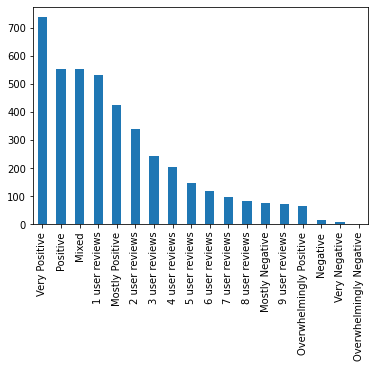

In [182]:
df_general['score_desc'].value_counts().plot.bar()

In [129]:
df_general['genre'] = df_general['genre'].str.split(',',expand = True,)

In [130]:
df_general.loc[df_general['genre'] =="Action Games", 'genre'] = 'Action'

In [131]:
genre_count = df_general['genre'].value_counts()

In [132]:
genre_count = genre_count[genre_count >20]

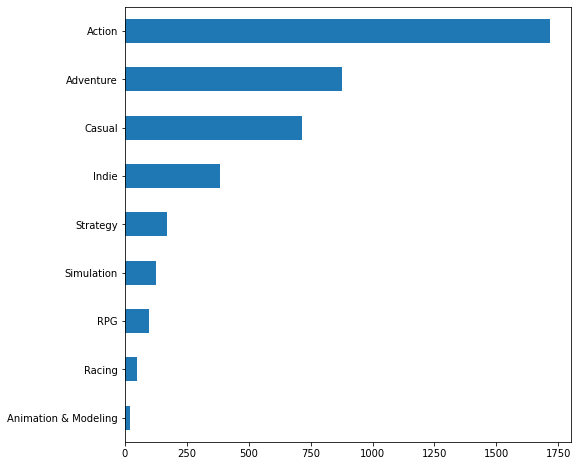

In [133]:
genre_count.sort_values(ascending=True).plot(kind='barh',figsize=(8,8))
plt.savefig('genre.png')

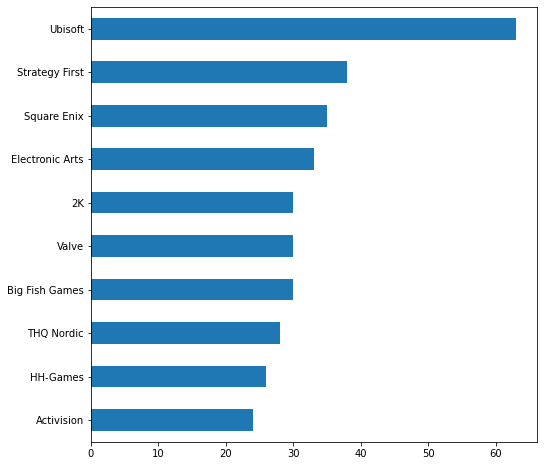

In [134]:
publisher_count = df_general.publisher.value_counts()
publisher_count = publisher_count[publisher_count >23]
publisher_count.sort_values(ascending=True).plot(kind='barh',figsize=(8,8))
plt.savefig('publisher.png')

In [148]:
df_test = df_general[['genre','total_reviews','total_negative','total_positive']].groupby('genre').sum()

In [149]:
df_test = df_test[df_test['total_reviews'] > 40000]

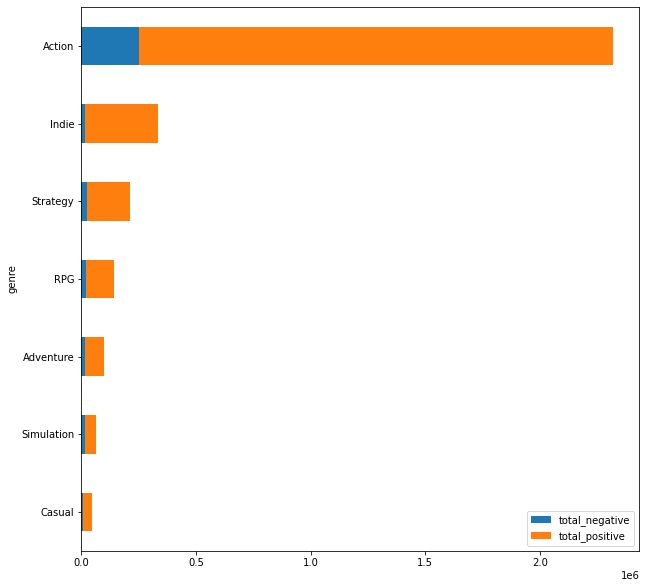

In [150]:
df_test.sort_values('total_reviews', ascending=True)[['total_negative','total_positive']].plot(kind='barh',stacked=True,figsize =(10,10))
plt.savefig('reviews_per_genre.png')

In [151]:
df_test = df_general[['publisher','total_reviews','total_negative','total_positive']].groupby('publisher').sum()

In [152]:
df_test = df_test[df_test['total_reviews'] > 50000]

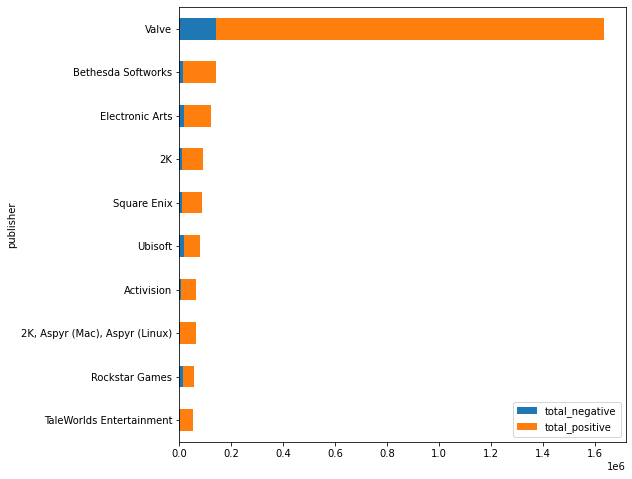

In [155]:
df_test.sort_values('total_reviews', ascending=True)[['total_negative','total_positive']].plot(kind='barh',stacked=True,figsize =(8,8))
plt.savefig('reviews_per_publisher.png')

In [193]:
df_test2 = df_general.groupby('genre').mean()

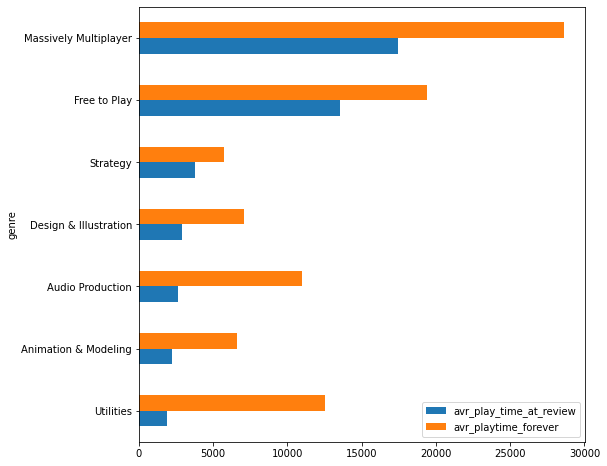

In [195]:
df_test2[df_test2['avr_playtime_forever']>3000].sort_values('avr_play_time_at_review', ascending=True)[['avr_play_time_at_review','avr_playtime_forever']].plot(stacked=False,kind='barh',figsize=(8,8))
plt.savefig('avrg_playtime.png')

In [135]:
df_reviews_with_helpfulness_score = df_reviews[df_reviews.helpfulness_score != 0]

In [136]:
df_new = df_reviews_with_helpfulness_score[df_reviews_with_helpfulness_score.review_readability < 20]

In [137]:
df_new = df_new[df_new.review_readability > 4]

<AxesSubplot:xlabel='review_readability'>

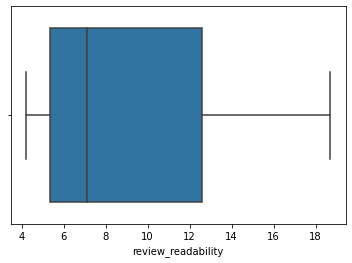

In [139]:
sns.boxplot(x=df_new[df_new.review_length <20]['review_readability'])

<AxesSubplot:xlabel='votes_up'>

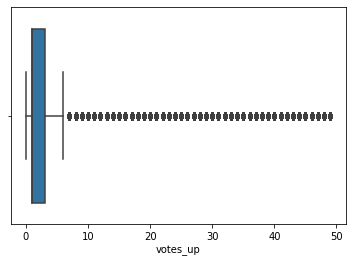

In [140]:
sns.boxplot(x=df_new[df_new['votes_up'] < 50]['votes_up'])

<AxesSubplot:xlabel='votes_funny'>

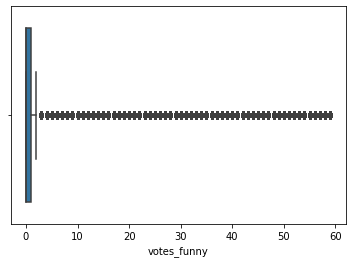

In [141]:
sns.boxplot(x=df_new[df_new['votes_funny'] < 60]['votes_funny'])

<AxesSubplot:xlabel='comment_count'>

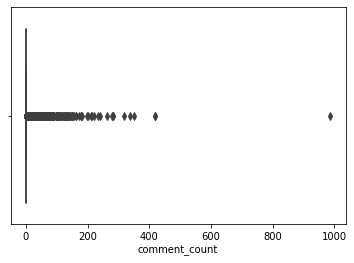

In [142]:
sns.boxplot(x=df_new[df_new['comment_count'] < 5000]['comment_count'])

In [145]:
df_positive = df_reviews_with_helpfulness_score[df_reviews_with_helpfulness_score.review_type == 1]
df_negative = df_reviews_with_helpfulness_score[df_reviews_with_helpfulness_score.review_type == 0]

<AxesSubplot:>

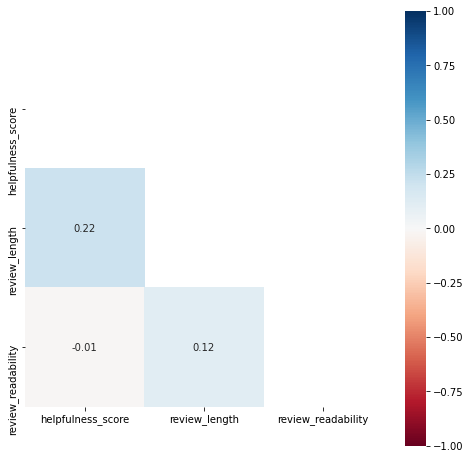

In [146]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = df_positive[["helpfulness_score", "review_length","review_readability"]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,fmt=".2f",annot=True,ax=ax,cmap="RdBu",vmin=-1,vmax=1,square=True,)

<AxesSubplot:>

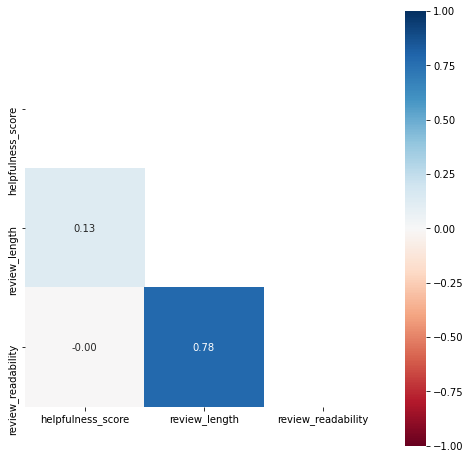

In [147]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = df_negative[["helpfulness_score", "review_length","review_readability"]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,fmt=".2f",annot=True,ax=ax,cmap="RdBu",vmin=-1,vmax=1,square=True,)

In [162]:
df_reviews[['review_type','playtime_at_review',
        'review_length','review_readability']].groupby('review_type').median()

,playtime_at_review,review_length,review_readability
review_type,,,
0,239.0,168,6.73
1,2011.0,48,4.31


In [256]:
a = df_reviews[['review_type','playtime_at_review',
        'review_length','review_readability']].groupby('review_type')

In [319]:
apos.playtime_at_review = apos.playtime_at_review/60

c:\users\33754\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [321]:
aneg.playtime_at_review = aneg.playtime_at_review/60

c:\users\33754\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


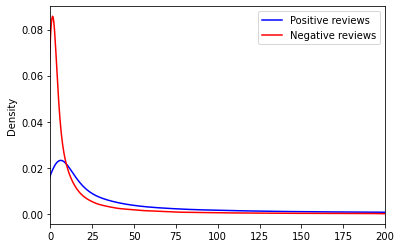

In [329]:
apos[apos.playtime_at_review <500]['playtime_at_review'].plot(kind='kde',xlim=(0,200),style = 'b-',label = 'Positive reviews')
aneg[aneg.playtime_at_review<200]['playtime_at_review'].plot(kind='kde',xlim=(0,200),style ='r-',label ='Negative reviews')
#plt.axvline(2011/60,linewidth=2, color='black')
#plt.axvline(239/60,linewidth=2, color='black')
plt.legend()

In [317]:
a1 = df_reviews[['review_type','playtime_at_review',
        'review_length','review_readability']]

In [318]:
apos = a1[a1.review_type==1]
aneg = a1[a1.review_type==0]

<AxesSubplot:ylabel='Density'>

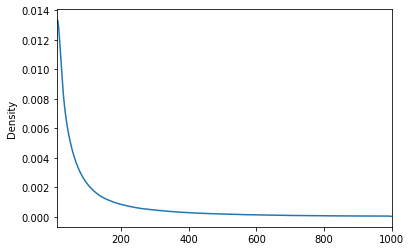

In [246]:
a1[a1.review_length <1000].review_length.plot(kind='kde',xlim=(10,1000))

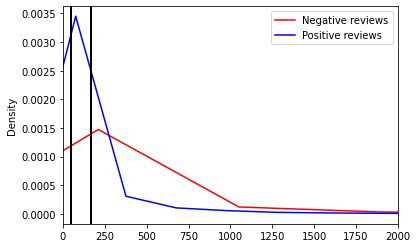

In [300]:
aneg.review_length.plot(kind='kde',xlim=(0,2000),style='r-',label='Negative reviews')
apos.review_length.plot(kind='kde',xlim=(0,2000),style='b-',label='Positive reviews')
plt.legend()
plt.axvline(168,linewidth=2, color='black')
plt.axvline(48,linewidth=2, color='black')
#plt.legend(framealpha=1, frameon=True)

In [ ]:
aneg.review_length.plot(kind='kde',xlim=(0,2000),style='r-',label='Negative reviews')
apos.review_length.plot(kind='kde',xlim=(0,2000),style='b-',label='Positive reviews')
plt.legend();
plt.axvline(168,linewidth=2, color='black')
plt.axvline(48,linewidth=2, color='black')
#plt.legend(framealpha=1, frameon=True)

### Players tend to write longer negative reviews with a higher level of readability, It means that negatives reviews are a valuable asset for new consumers or developers 

In [158]:
len(df_reviews[df_reviews['num_games_owned'] > 10])/len(df_reviews)*100

87.59981438429801

### The number of games that the reviewer own can't really be a factor since 87.5% of reviewer have more than 10 games

In [160]:
len(df_reviews[df_reviews['num_games_owned'] == df_reviews['num_reviews']])

66572

### Sometimes it's suspicious when the reviewer has a number of reviews equals to the number of games he owns. Even though 2.18 % is low, it accounts for 66572 reviews

In [178]:
cond = (df_reviews['playtime_forever'] == df_reviews['playtime_at_review']) & df_reviews['review_type'] == 1
cond2 = (df_reviews['playtime_forever'] == df_reviews['playtime_at_review']) & (df_reviews['review_type'] == 0)

In [180]:
len(df_reviews[cond2])/len(df_reviews)

0.04043015848220439

In [181]:
len(df_reviews[cond])/len(df_reviews)

0.13586537742078186